
# The Best Model As Of July 2 2020

Using TensorFlow backend.


sorting data by tag
308955
303925
creating default model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_______________________________________________________________

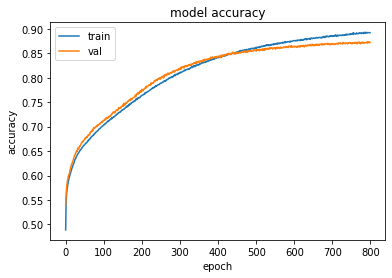

In [1]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="6"
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout
sys.path.append(os.path.realpath("../../"))
import ptetaphi_nn
import tools
with open("/home/cmccracken/start_tf/bbb/filepath.txt", 'r') as f:
    filename = f.read()
    
s_table = tools.open_file(filename, sort_by="tag")
# filter by realistic situation where we have 3 tags and 3 or 4 jets.
# ignore the case where there may be >4 since those are pretty rare
nb4 = (s_table.nbjets == 3) | (s_table.nbjets == 4) # 3 or 4 b-jets exist
nt3 = s_table.nbtags==3  # 3 b tags
nb4nt3 = nb4 & nt3
events = s_table[nb4nt3]
print(len(events))

# and ensure that the 3 tags are actually correct
# this results in very little event loss
events = events[events.truth[:,0] == 1]
events = events[events.truth[:,1] == 1]
events = events[events.truth[:,2] == 1]
print(len(events))

cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)

import importlib
importlib.reload(ptetaphi_nn)
nn = ptetaphi_nn.PtEtaPhiNN(events, chop=0, print_summary=True)
nn.learn(epochs=800)


100%|██████████| 60785/60785 [00:00<00:00, 171319.81it/s]


overall accuracy: 89.05 percent
ignoring 0.00 percent (0 events) of 60785 events


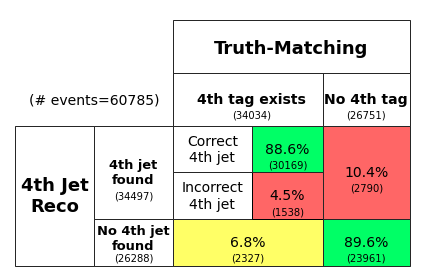

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [2]:
nn.evaluate(savename="best_with_all_jets")

In [6]:
# save the architecture string to a file
models_dir = "/home/cmccracken/start_tf/bbb/models/"
with open(models_dir+'architecture_02_07_2020.json', 'w') as arch_file:
    arch_file.write(nn.model.to_json())
# now save the weights as an HDF5 file
nn.model.save_weights(models_dir+'weights_02_07_2020.h5')
# and print csv
tools.scale_nn_input(events, chop=0, save_csv=models_dir+"scaling_parameters_02_07_2020")

array([[-1.1383898e+00, -9.1206354e-01, -5.6130493e-01, ...,
        -3.9141234e-03,  1.3328490e-03,  2.2829163e-03],
       [-2.2350993e-02,  5.4453796e-01, -8.5422295e-01, ...,
        -3.9141234e-03,  1.3328490e-03,  2.2829163e-03],
       [ 5.7765067e-01,  1.5442677e+00, -8.4189606e-01, ...,
        -3.9141234e-03,  1.3328490e-03,  2.2829163e-03],
       ...,
       [ 4.2004883e-01,  4.4985023e-01,  3.6350715e-01, ...,
        -3.8165338e+00,  8.4538841e+00,  6.1675253e+00],
       [-3.4913829e-01, -1.6886887e-01,  7.5339997e-01, ...,
        -3.9141234e-03,  1.3328490e-03,  2.2829163e-03],
       [ 3.4535319e-01,  1.2522689e-01,  4.4298139e-01, ...,
        -1.0616757e+00,  1.3328490e-03,  2.2829163e-03]], dtype=float32)